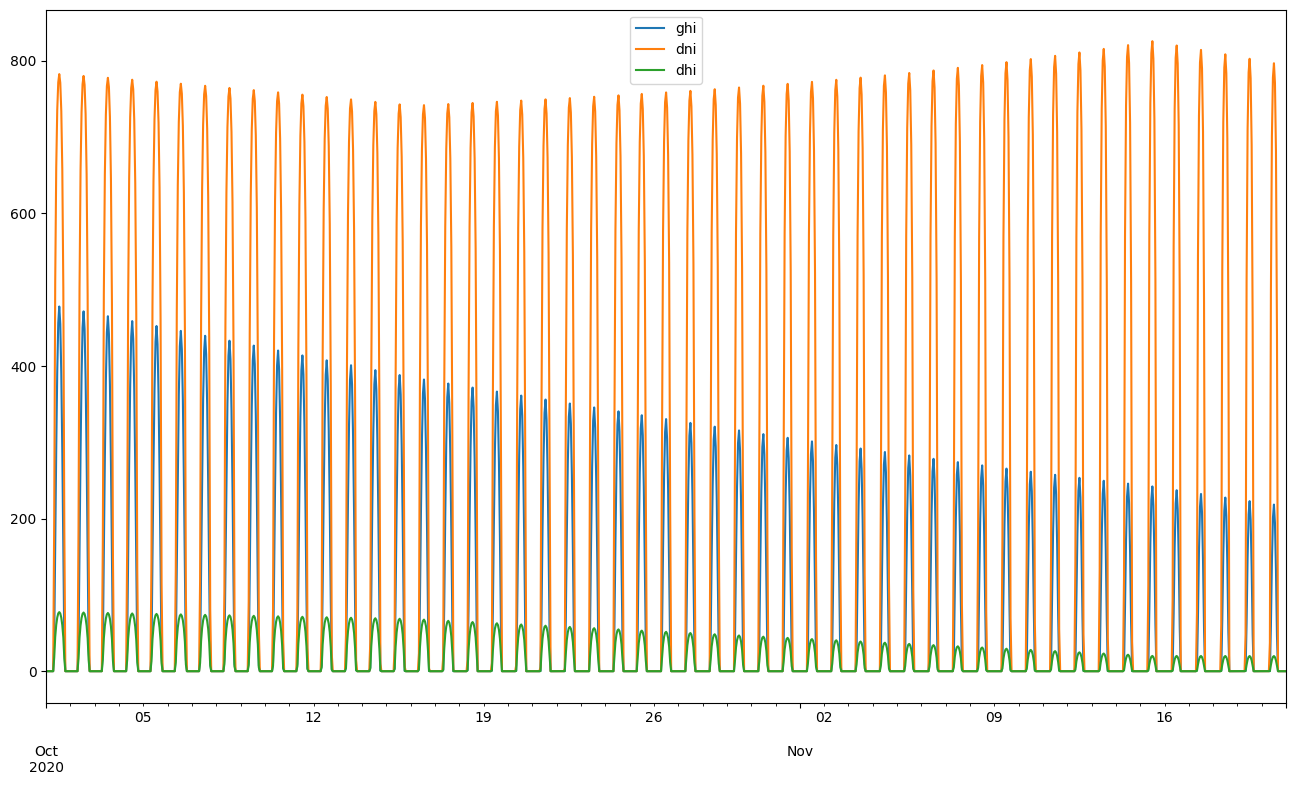

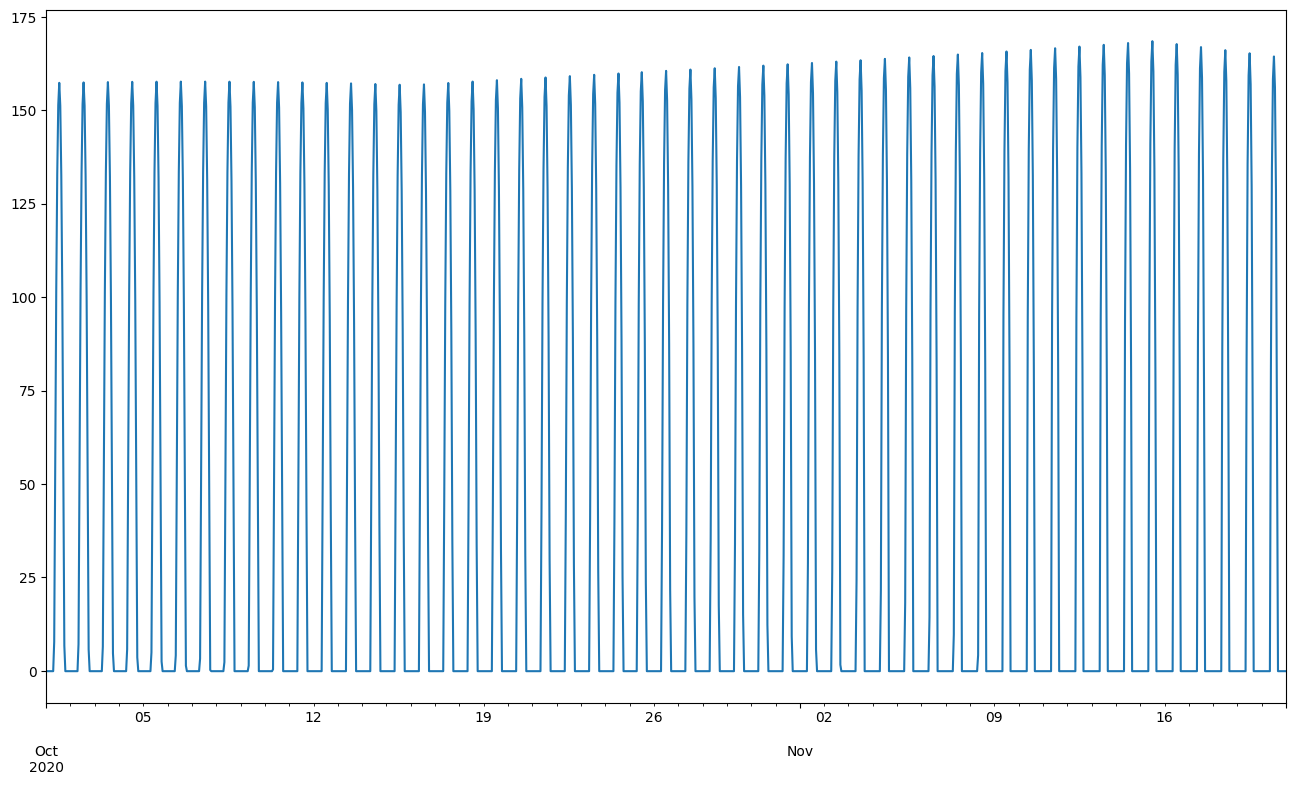

'AC output of the PDSystem, AC meaning is the energy yield in watss behind the inverter'

In [17]:
'''Model Solar Panel Settings
Group SolarPanel03
Authors: Pedro, Morin, Danu, Ania, Gustav, Diego'''

import pvlib

from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import pandas as pd
import matplotlib.pyplot as plt

location = Location(latitude=55.78505061217175, longitude=12.51974478835592,
                    tz='Europe/Copenhagen', altitude = 155, name='Dtu 303') #Building 303

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

temperature_parameteres = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = PVSystem(surface_tilt = 90, surface_azimuth = 180,
                  module_parameters = module, inverter_parameters = inverter,
                  temperature_model_parameters = temperature_parameteres)

modelchain = ModelChain(system, location)

times = pd.date_range(start='2020-10-01', end='2020-11-21',
                      freq='1h', tz = location.tz)

clear_sky = location.get_clearsky(times)

clear_sky.plot(figsize=(16,9))
plt.show()

'''ghi = global horizontal iradiance
   dni = direct normal iradiance
   dhi = diffuse horizontal iradiance'''

modelchain.run_model(clear_sky)
modelchain.results.ac.plot(figsize=(16,9))
plt.show()

'''AC output of the PDSystem, AC meaning is the energy yield in watss behind the inverter'''